In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# KNN(Glass Dataset)

In [2]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## EDA

In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [12]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

## Feature Scaling

In [52]:
x = df.iloc[:,:-1]
y = df['Type']

In [53]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [54]:
x

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

## Splittng the data

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

## Model Building

In [19]:
def predict(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(model.score(xtrain,ytrain))
    print(model.score(xtest,ytest))
    print(classification_report(ytest,ypred))

In [21]:
predict(KNeighborsClassifier(n_neighbors=2))

0.8050314465408805
0.7222222222222222
              precision    recall  f1-score   support

           1       0.73      0.86      0.79        22
           2       0.68      0.76      0.72        17
           3       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5

    accuracy                           0.72        54
   macro avg       0.57      0.60      0.59        54
weighted avg       0.64      0.72      0.68        54



## HyperParameter Tuning

In [22]:
trainac = []
testac = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

In [23]:
trainac

[1.0,
 0.8050314465408805,
 0.8176100628930818,
 0.7735849056603774,
 0.7421383647798742,
 0.7484276729559748,
 0.7044025157232704,
 0.7044025157232704,
 0.6792452830188679,
 0.6792452830188679,
 0.6981132075471698,
 0.6792452830188679,
 0.6415094339622641,
 0.6415094339622641,
 0.660377358490566,
 0.6415094339622641,
 0.6477987421383647,
 0.6226415094339622,
 0.660377358490566,
 0.6540880503144654,
 0.6477987421383647,
 0.5974842767295597,
 0.6289308176100629,
 0.6226415094339622,
 0.610062893081761,
 0.610062893081761,
 0.5786163522012578,
 0.5660377358490566,
 0.5723270440251572]

In [24]:
testac

[0.7777777777777778,
 0.7222222222222222,
 0.7592592592592593,
 0.7222222222222222,
 0.7407407407407407,
 0.7222222222222222,
 0.6851851851851852,
 0.7037037037037037,
 0.7037037037037037,
 0.7037037037037037,
 0.7037037037037037,
 0.7037037037037037,
 0.7407407407407407,
 0.7037037037037037,
 0.7222222222222222,
 0.7037037037037037,
 0.6851851851851852,
 0.6851851851851852,
 0.7222222222222222,
 0.6666666666666666,
 0.6851851851851852,
 0.6666666666666666,
 0.7037037037037037,
 0.6851851851851852,
 0.6666666666666666,
 0.6481481481481481,
 0.6851851851851852,
 0.6481481481481481,
 0.6666666666666666]

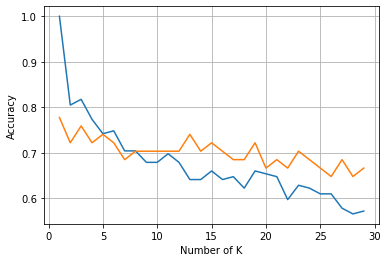

In [25]:
plt.plot(range(1,30),trainac)
plt.plot(range(1,30), testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

* From the above plot, we can observe that at number of K = 5, they are intersecting. so, at k= 5 we can conclude training and testing accuracy will be similar.

In [26]:
predict(KNeighborsClassifier(n_neighbors=5))

0.7421383647798742
0.7407407407407407
              precision    recall  f1-score   support

           1       0.70      0.86      0.78        22
           2       0.72      0.76      0.74        17
           3       0.00      0.00      0.00         7
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5

    accuracy                           0.74        54
   macro avg       0.65      0.77      0.70        54
weighted avg       0.65      0.74      0.69        54



* We can conclude that k = 5 is an optimal value

# KNN(Zoo Dataset)

In [38]:
df1 = pd.read_csv('Zoo.csv')
df1.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## EDA

In [28]:
df1.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [34]:
df1.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [35]:
df1.duplicated().sum()

0

In [36]:
df1.shape

(101, 18)

## Encoding

In [32]:
import category_encoders as ce

In [33]:
Ordinal = ce.OrdinalEncoder(cols = ['animal name'])
Ordinal

OrdinalEncoder(cols=['animal name'])

In [39]:
df2 = Ordinal.fit_transform(df1)

In [40]:
df2.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Feature Scaling

In [48]:
x1 = df2.iloc[:,:-1]
y1 = df2['type']

In [49]:
x1

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [50]:
y1

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

## Splitting the data

In [51]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x1,y1,test_size=0.25,random_state=1)

## Model Building

In [57]:
def predict(model1):
    model1.fit(xtrain,ytrain)
    ypred = model1.predict(xtest)
    
    print(model1.score(xtrain,ytrain))
    print(model1.score(xtest,ytest))
    print(classification_report(ytest,ypred))

In [58]:
predict(KNeighborsClassifier(n_neighbors=5))

0.5733333333333334
0.3076923076923077
              precision    recall  f1-score   support

           1       0.44      0.58      0.50        12
           2       0.11      0.20      0.14         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3

    accuracy                           0.31        26
   macro avg       0.08      0.11      0.09        26
weighted avg       0.22      0.31      0.26        26



## HyperParameter Tuning

In [59]:
trainacc = []
testacc = []

for i in range(1,30):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(xtrain,ytrain)
    ypred = knn1.predict(xtest)
    
    trainacc.append(knn1.score(xtrain,ytrain))
    testacc.append(knn1.score(xtest,ytest))

In [60]:
trainacc

[1.0,
 0.7466666666666667,
 0.68,
 0.68,
 0.5733333333333334,
 0.5866666666666667,
 0.5333333333333333,
 0.52,
 0.49333333333333335,
 0.4666666666666667,
 0.4533333333333333,
 0.44,
 0.4,
 0.4,
 0.38666666666666666,
 0.36,
 0.32,
 0.3333333333333333,
 0.32,
 0.32,
 0.36,
 0.3466666666666667,
 0.3466666666666667,
 0.3466666666666667,
 0.3466666666666667,
 0.3466666666666667,
 0.38666666666666666,
 0.38666666666666666,
 0.38666666666666666]

In [62]:
testacc

[0.46153846153846156,
 0.4230769230769231,
 0.38461538461538464,
 0.34615384615384615,
 0.3076923076923077,
 0.38461538461538464,
 0.4230769230769231,
 0.38461538461538464,
 0.4230769230769231,
 0.38461538461538464,
 0.4230769230769231,
 0.4230769230769231,
 0.46153846153846156,
 0.38461538461538464,
 0.38461538461538464,
 0.4230769230769231,
 0.38461538461538464,
 0.4230769230769231,
 0.46153846153846156,
 0.4230769230769231,
 0.4230769230769231,
 0.46153846153846156,
 0.46153846153846156,
 0.46153846153846156,
 0.46153846153846156,
 0.46153846153846156,
 0.46153846153846156,
 0.46153846153846156,
 0.46153846153846156]

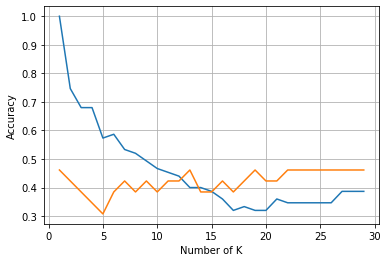

In [63]:
plt.plot(range(1,30),trainacc)
plt.plot(range(1,30), testacc)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

* From the above plot, we can observe that at number of K = 12 & 15, they are intersecting. so, at k= 12 or k = 15 we can conclude that training and testing accuracy will be similar.

In [64]:
predict(KNeighborsClassifier(n_neighbors=12))

0.44
0.4230769230769231
              precision    recall  f1-score   support

           1       0.48      0.92      0.63        12
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3

    accuracy                           0.42        26
   macro avg       0.07      0.13      0.09        26
weighted avg       0.22      0.42      0.29        26



In [67]:
predict(KNeighborsClassifier(n_neighbors=15))

0.38666666666666666
0.38461538461538464
              precision    recall  f1-score   support

           1       0.41      0.75      0.53        12
           2       0.25      0.20      0.22         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3

    accuracy                           0.38        26
   macro avg       0.09      0.14      0.11        26
weighted avg       0.24      0.38      0.29        26



* we can conclude that k = 15 is an optimal value 